In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
directory = os.getcwd()

In [192]:
start_date = "2014-01-01"
end_date = "2015-12-31"
dates = pd.date_range(start_date, end_date)


In [193]:
symbols = ['cac40', 'ubisoft', 'bnp', 'airbus']
def get_data(symbols ,dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        data= pd.read_csv(directory+"/{}.csv".format(symbol), index_col="Date", 
                  usecols=['Date', 'Adj Close'], na_values="nan", parse_dates=True)
        data = data.rename(columns={'Adj Close':symbol})
        df = df.join(data)
        df = df.dropna()
        df = df.iloc[::-1]
    return df

In [188]:
df = get_data(symbols, dates)

In [189]:
def normalized(df):
    df_norm = df / df.ix[0,:]
    return df_norm

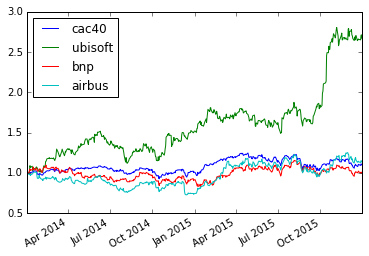

In [190]:
df_norm = normalized(df)
df_norm.plot()

In [78]:
#répartition de l'allocation par indice
alloc = [0.4,0.4,0.1,0.1]
def allocation(df):
    df_allocation = df * alloc
    return df_allocation

In [103]:
df_alloc = allocation(df_norm)
df_alloc.head()

,cac40,ubisoft,bnp,airbus
2014-01-02,0.400000,0.400000,0.100000,0.100000
2014-01-03,0.401927,0.402199,0.100252,0.099734
2014-01-06,0.400025,0.401399,0.100414,0.098020
2014-01-07,0.403350,0.410195,0.103295,0.098868
2014-01-08,0.403187,0.435782,0.104771,0.097877


In [81]:
#capital mis en bourse
capital = 1000

In [120]:
def post_val(df):
    df_postval = df * capital
    return df_postval

In [121]:
post_val = post_val(df_alloc)
post_val.head()

,cac40,ubisoft,bnp,airbus
2014-01-02,400.000000,400.000000,100.000000,100.000000
2014-01-03,401.927492,402.198901,100.251944,99.733938
2014-01-06,400.024626,401.399300,100.413979,98.019524
2014-01-07,403.349709,410.194903,103.294846,98.868299
2014-01-08,403.186936,435.782109,104.771143,97.877124


In [162]:
#sum de toutes les colonnes par jour pour données un aperçu de la valeur du portfeuille
def port_val(values, dates):
    port_val = values.sum(axis=1)
    port_val = port_val.to_frame()
    port_val = port_val.rename(columns={0:"values"})
    return port_val

In [163]:
port_val = port_val(post_val, dates)
port_val.describe()

,values
count,511.000000
mean,1270.827600
std,204.782309
min,985.384322
25%,1115.089385
50%,1212.284415
75%,1363.488070
max,1823.219007


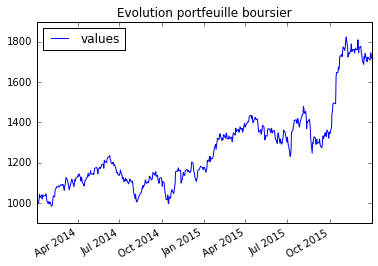

In [164]:
port_val.plot(title="Evolution portfeuille boursier")

In [165]:
#Daily return pour chaque jour
def daily_return(values):
    daily_r = (values / values.shift(1))-1
    return daily_r

In [180]:
daily_r = daily_return(port_val)
daily_r = daily_r.dropna()
daily_r

,values
2014-01-03,0.004112
2014-01-06,-0.004237
2014-01-07,0.015853
2014-01-08,0.025509
2014-01-09,-0.014269
2014-01-10,0.004937
2014-01-13,0.007311
2014-01-14,-0.018827
2014-01-15,0.020497
2014-01-16,-0.007398


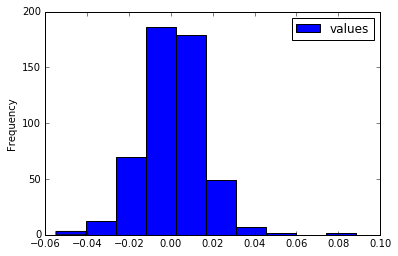

In [198]:
daily_r.plot(kind="hist")

Beta : 0.789374041321
alpha: 0.00196149204365


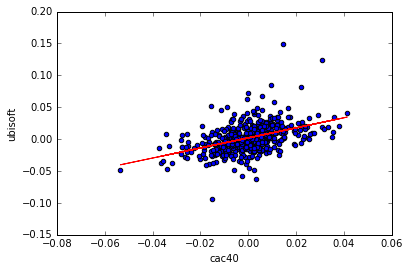

In [208]:
#comparaison des différentes entreprises face au cac
daily_returns = (df_norm / df_norm.shift(1))-1
daily_returns = daily_returns.dropna()

#Comparaison Ubisoft
x_cac = daily_returns["cac40"]
y_ubi = daily_returns["ubisoft"]
daily_returns.plot(kind="scatter",x="cac40", y="ubisoft")
beta_ubi, alpha_ubi = np.polyfit(x_cac,y_ubi,1)
plt.plot(x_cac, beta_ubi*x_cac + alpha_ubi,'-', color="r")
print("Beta :", beta_ubi)
print("alpha:", alpha_ubi)
